# Training a simple Convolutional Neural Network to classify the MNIST dataset using TensorFlow

Default settings:
training epochs 12 
training size 50000
validation size 10000
testset size 10000 

leaning_rate 0.001
num_filters 16
batch_size 128
filter_size 3

## Imports

In [10]:
import time
import os
import json
from matplotlib import pyplot as plt

## Helper functions to display the results

In [13]:
def plot_learning_curve(learning_curve, label='Learning Curve'):
    plt.xlim(0, len(learning_curve)+1)
    plt.plot(range(1,len(learning_curve)+1), learning_curve, label=label)
    
def plot_error_curve(error_curve, label='Error Curve'):
    plt.xlim(0, len(error_curve)+1)
    plt.plot(range(1,len(error_curve)+1), error_curve, label=label)


def load_result(file_name):
    with open(file_name) as data_file:
        results = json.load(data_file)
    learning_curve = [float(i) for i in results['learning_curve']]
    error_curve = [1-float(i) for i in results['learning_curve']]
    results.pop('learning_curve')
    results['learning_curve'] = learning_curve
    results['error_curve'] = error_curve
    return results

def create_accuracy_plot(run_ids, run_labels, title, saveName):
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel("Accuracy on validation set")
    for run_id, run_label in zip(run_ids, run_labels):
        file_name = 'results/results_run_{}.json'.format(run_id)
        result = load_result(file_name)
        plot_learning_curve(result['learning_curve'], run_label)
    plt.legend()
    plt.grid()
    plt.savefig("images/" + saveName + ".pdf")
    plt.show()
    
def create_error_plot(run_ids, run_labels, title, saveName):
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel("Validation error")
    for run_id, run_label in zip(run_ids, run_labels):
        file_name = 'results/results_run_{}.json'.format(run_id)
        result = load_result(file_name)
        plot_error_curve(result['error_curve'], run_label)
    plt.legend()
    plt.grid()
    plt.savefig("images/" + saveName + ".pdf")
    plt.show()
    
def run_configuration(run_id=0, batch_size=128, learning_rate=0.001, num_filters=16, filter_size=3):
    # os.system('clear')
    # os.system('rm tmp/mnist_convnet_model/*')
    os.system('python3 cnn_mnist.py --run_id={0} --batch_size={1} --learning_rate={2}\
              --num_filters={3} --filter_size={4}'.format(run_id, batch_size, learning_rate, num_filters, filter_size))

## Testing the default network

In [ ]:
run_configuration(run_id=0)

In [ ]:
run_ids = [0]
run_labels = ["default settings, batch size 128"]
title = 'Learning Curve the default network'
file_name = "Learning_curve_default"
create_accuracy_plot(run_ids, run_labels, title, file_name)
title = 'Error Curve the default network'
file_name = "Error_curve_default"
create_error_plot(run_ids, run_labels, title, file_name)

In [ ]:
run_configuration(run_id=10, batch_size=64)

In [ ]:
run_ids = [10]
run_labels = ['default settings, batch size 64']
title = 'Learning Curve the default network with smaller batch size: 64'
file_name = "Learning_curve_default_bs_64"

create_accuracy_plot(run_ids, run_labels, title, file_name)

In [ ]:
run_configuration(run_id=11, batch_size=32)

In [ ]:
run_ids = [11]
run_labels = ['default settings, batch size 32']
title = 'Learning Curve the default network with smaller batch size: 32'
file_name = "Learning_curve_default_bs_32"

create_accuracy_plot(run_ids, run_labels, title, file_name)

In [ ]:
run_configuration(run_id=12, batch_size=16)

In [ ]:
run_ids = [12]
run_labels = ['default settings, batch size 16']
title = 'Learning Curve the default network with smaller batch size: 16'
file_name = "Learning_curve_default_bs_16"

create_accuracy_plot(run_ids, run_labels, title, file_name)

In [ ]:
run_configuration(run_id=13, batch_size=8)

In [ ]:
run_ids = [13]
run_labels = ['default settings, batch size 8']
title = 'Learning Curve the default network with smaller batch size: 8'
file_name = "Learning_curve_default_bs_8"

create_accuracy_plot(run_ids, run_labels, title, file_name)

In [ ]:
run_ids = [0,10,11,12,13]
batch_sizes = [128, 64, 32, 16, 8]
for run_id, batch_size in zip(run_ids, batch_sizes):
    run_configuration(run_id, batch_size)

In [ ]:
run_ids = [0,10,11,12,13]
run_labels = [128, 64, 32, 16, 8]

title = 'Learning Curve for different batch sizes between 8 and 128'
file_name = "Learning_curve_for_Batch_Sizes"
create_accuracy_plot(run_ids, run_labels, title, file_name)

title = 'Error Curve for different batch sizes between 8 and 128'
file_name = "Error_curve_for_Batch_Sizes"
create_error_plot(run_ids, run_labels, title, file_name)

### Learning Rate Experiments

Let the training run for 12 epoch with 4 different learning rate settings: (0.1, 0.01, 0.001, 0.0001).

In [ ]:
time1 = time.time()

run_ids = [5021, 5022, 5023, 5024]
learning_rates = [0.1, 0.01, 0.001, 0.0001]
for run_id, learning_rate in zip(run_ids, learning_rates):
    time1 = time.time()
    run_configuration(run_id=run_id, learning_rate=learning_rate)
    print("This took: ", time.time()-time1)

In [ ]:
run_ids = [5021,5022,5023,5024]
run_labels = ["0.1", "0.01", "0.001", "0.0001"]

title = 'Learning Curve for different Learning Rates between 0.1 and 0.0001'
file_name = "Learning_curve_for_Learning_Rates"
create_accuracy_plot(run_ids, run_labels, title, file_name)

title = 'Error Curve for different Learning Rates between 0.1 and 0.0001'
file_name = "Error_curve_for_Learning_Rates"
create_error_plot(run_ids, run_labels, title, file_name)

## Filter Size Experiments
Let the training run for 12 epochs with 4 different filter_sizes: 1, 3, 5, 7.

In [ ]:
run_ids = [5031, 5032, 5033, 5034]
filter_sizes = [1, 3, 5, 7]
for run_id, filter_size in zip(run_ids, filter_sizes):
    run_configuration(run_id=run_id, filter_size=filter_size)

In [ ]:
run_ids = [5031, 5032, 5033, 5034]
filter_sizes = [1, 3, 5, 7]

title = 'Learning Curve for different Filter Sizes between 1 and 7'
file_name = 'Learning_curve_for_Filter_Sizes'
create_accuracy_plot(run_ids, filter_sizes, title, file_name)

title = 'Error Curve for different Filter Sizes between 1 and 7'
file_name = 'Error_curve_for_Filter_Sizes'
create_error_plot(run_ids, filter_sizes, title, file_name)

In [ ]:
import json
import matplotlib.pyplot as plt
import os
from hpbandster.core.result import Run
import numpy as np

from collections import OrderedDict
from operator import *


with open('results/ah_allruns_results_run_9999.json', 'r') as fh:
    all_runs_serialized = json.load(fh)

all_runs_sorted = OrderedDict(sorted(all_runs_serialized.items(), key=lambda x: getitem(x[1], 'config_id')))
all_runs = []

for i, v in all_runs_serialized.items():
    r = Run(config_id=v['config_id'],
            budget=v['budget'],
            loss=v['loss'],
            info=v['info'],
            time_stamps=v['time_stamps'],
            error_logs=None
            )
    all_runs.append(r)
    

# Compare source of:
#     import hpbandster.visualization as hpvis
#     hpvis.losses_over_time(all_runs)
import matplotlib.pyplot as plt
get_loss_from_run_fn = lambda r: r.loss
budgets = set([r.budget for r in all_runs])
data = {}
for b in budgets:
    data[b] = []
for i, r in enumerate(all_runs):
    if r.loss is None:
        continue
    b = r.budget
    # t = r.time_stamps['finished']
    l = get_loss_from_run_fn(r)
    t = i
    data[b].append((t,l))

for b in budgets:
    data[b].sort()


fig, ax = plt.subplots()

for i, b in enumerate(budgets):
    data[b] = np.array(data[b])
    ax.scatter(range(1, len(data[b][:,0])+1), data[b][:,1], label='data')
    
    ax.step(range(1, len(data[b][:,0])+1), np.minimum.accumulate(data[b][:,1]), where='post')

ax.set_title('Validation errors over the different iterations')
ax.set_xlabel('iteration')
ax.set_ylabel('validation error')
plt.xlim(0, len(data[b][:,0])+1)
ax.legend()
plt.savefig("images/ah_random_search.png")
plt.show()

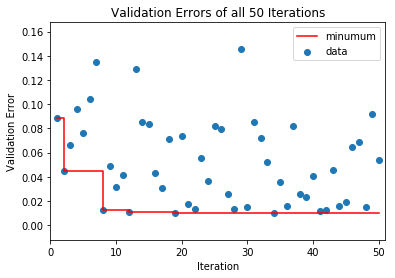

In [18]:
%matplotlib inline 

import json
import matplotlib.pyplot as plt
import os
from hpbandster.core.result import Run
import numpy as np

from collections import OrderedDict
from operator import *


with open('results/ah_allruns_results_run_9999.json', 'r') as fh:
    all_runs_serialized = json.load(fh)

all_runs_sorted = OrderedDict(sorted(all_runs_serialized.items(), key=lambda x: getitem(x[1], 'config_id')))
all_runs = []

for i, v in all_runs_serialized.items():
    r = Run(config_id=v['config_id'],
            budget=v['budget'],
            loss=v['loss'],
            info=v['info'],
            time_stamps=v['time_stamps'],
            error_logs=None
            )
    all_runs.append(r)
    

# Compare source of:
#     import hpbandster.visualization as hpvis
#     hpvis.losses_over_time(all_runs)
import matplotlib.pyplot as plt
get_loss_from_run_fn = lambda r: r.loss
budgets = set([r.budget for r in all_runs])
data = {}
for b in budgets:
    data[b] = []
for i, r in enumerate(all_runs):
    if r.loss is None:
        continue
    b = r.budget
    # t = r.time_stamps['finished']
    l = get_loss_from_run_fn(r)
    t = i
    data[b].append((t,l))

for b in budgets:
    data[b].sort()


plt.title('Validation Errors of all 50 Iterations')
plt.xlabel('Iteration')
plt.ylabel('Validation Error')

for i, b in enumerate(budgets):
    data[b] = np.array(data[b])
    plt.scatter(range(1, len(data[b][:,0])+1), data[b][:,1], label='data')
    
    plt.step(range(1, len(data[b][:,0])+1), np.minimum.accumulate(data[b][:,1]), where='post', c='r', label='minumum')

plt.xlim(0, len(data[b][:,0])+1)
plt.legend()
plt.savefig("images/ah_random_search.pdf")
plt.show()

In [14]:
# CONFIG:  {'batch_size': 44, 'filter_size': 3, 'learning_rate': 0.0549155222931937, 'num_filters': 17}

run_configuration(run_id=18, batch_size=44, filter_size=3, learning_rate=0.0549155222931937, num_filters=17)

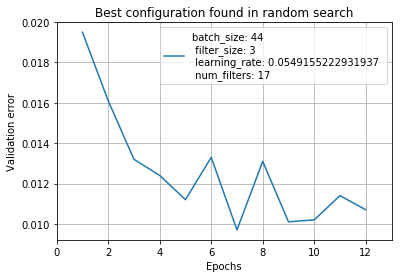

In [17]:
run_ids = [18]
run_labels = ["batch_size: 44 \n filter_size: 3 \n learning_rate: 0.0549155222931937 \n num_filters: 17"]
title = "Best configuration found with Random Search"
saveName = "Random_Search_Best_Configuration"

create_error_plot(run_ids, run_labels, title, saveName)